## Import Libraries:

In [45]:

import pandas as pd
import numpy as np
import scipy.stats as sc
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt




## Import Data:

In [46]:
df = pd.read_excel('database.xlsx')

## Data Cleaning  and Preprocessing:

In [47]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [49]:
df.shape

(7560, 6)

In [50]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

#### To ensure that the data is clean and that there is no missing or incorrect data


In [51]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [52]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [53]:
df['Date'].min()

Timestamp('2020-10-01 00:00:00')

In [54]:
df['Date'].max()

Timestamp('2020-12-30 00:00:00')

#### Data normalization:

In [55]:
df_numdata = df[['Sales', 'Unit']]

In [56]:
scaler = MinMaxScaler()

In [57]:
scaler.fit_transform(df_numdata)

array([[0.0952381 , 0.0952381 ],
       [0.0952381 , 0.0952381 ],
       [0.03174603, 0.03174603],
       ...,
       [0.20634921, 0.20634921],
       [0.14285714, 0.14285714],
       [0.17460317, 0.17460317]])

## Data Analysis:

#### Descriptive statistical analysis on the data :

In [58]:
sales_mean = df['Sales'].mean()
sales_median = df['Sales'].median()
sales_mode = df['Sales'].mode().iloc[0]
sales_std = df['Sales'].std()

unit_mean = df['Unit'].mean()
unit_median = df['Unit'].median()
unit_mode = df['Unit'].mode().iloc[0]
unit_std = df['Unit'].std()


In [59]:
# group and calculate total sales for each group
group_sales = df.groupby('Group')['Sales'].sum()
highest_sales_group = group_sales.idxmax()
lowest_sales_group = group_sales.idxmin()


In [60]:
# Group by 'State' and calculate total sales for each state
state_sales = df.groupby('State')['Sales'].sum()
highest_sales_state = state_sales.idxmax()
lowest_sales_state = state_sales.idxmin()


In [61]:
# ensure that the date column is in a datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [62]:
#'resample' function in Pandas to aggregate data based on different time periods.

#Daily report 
Daily_report = df['Sales'].resample('D').sum()
# Weekly report
weekly_report = df['Sales'].resample('W').sum()

# Monthly report
monthly_report = df['Sales'].resample('M').sum()

# Quarterly report
quarterly_report = df['Sales'].resample('Q').sum()


#print('Daily', Daily_report)
#print('Monthly', Weekly_report)
#print('Monthly', monthly_report)
#print('quarterly', quarterly_report)

In [63]:
summary_report = f"Sales Statistics:\n\n\
- Mean Sales: {sales_mean:.2f}\n\
- Median Sales: {sales_median:.2f}\n\
- Mode Sales: {sales_mode:.2f}\n\
- Standard Deviation Sales: {sales_std:.2f}\n\
- Mean Unit: {unit_mean:.2f}\n\
- Median Unit: {unit_median:.2f}\n\
- Mode Unit: {unit_mode:.2f}\n\
- Standard Deviation Unit: {unit_std:.2f}\n\n\
Highest Sales Group: {highest_sales_group}\n\
Lowest Sales Group: {lowest_sales_group}\n\n\
Highest Sales State: {highest_sales_state}\n\
Lowest Sales State: {lowest_sales_state}\n"

print(summary_report)

Sales Statistics:

- Mean Sales: 45013.56
- Median Sales: 35000.00
- Mode Sales: 22500.00
- Standard Deviation Sales: 32253.51
- Mean Unit: 18.01
- Median Unit: 14.00
- Mode Unit: 9.00
- Standard Deviation Unit: 12.90

Highest Sales Group:  Men
Lowest Sales Group:  Seniors

Highest Sales State:  VIC
Lowest Sales State:  WA



## Data Visualization:

#### *State-wise sales analysis for different groups*

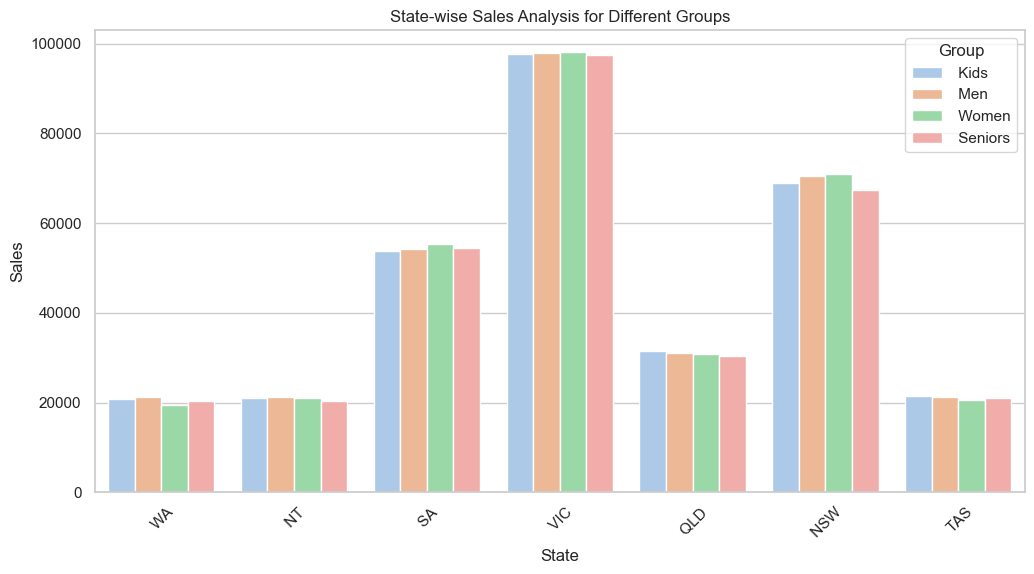

In [64]:
# State-wise sales analysis for different groups

plt.figure(figsize=(12, 6))


sns.barplot(x='State', y='Sales', hue='Group', data=df, palette='pastel', ci=None, saturation=0.7, capsize=0.2, errcolor='0.2')

plt.title('State-wise Sales Analysis for Different Groups')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

#### *Group-wise sales analysis (kids, women, men, and seniors) across different states.*

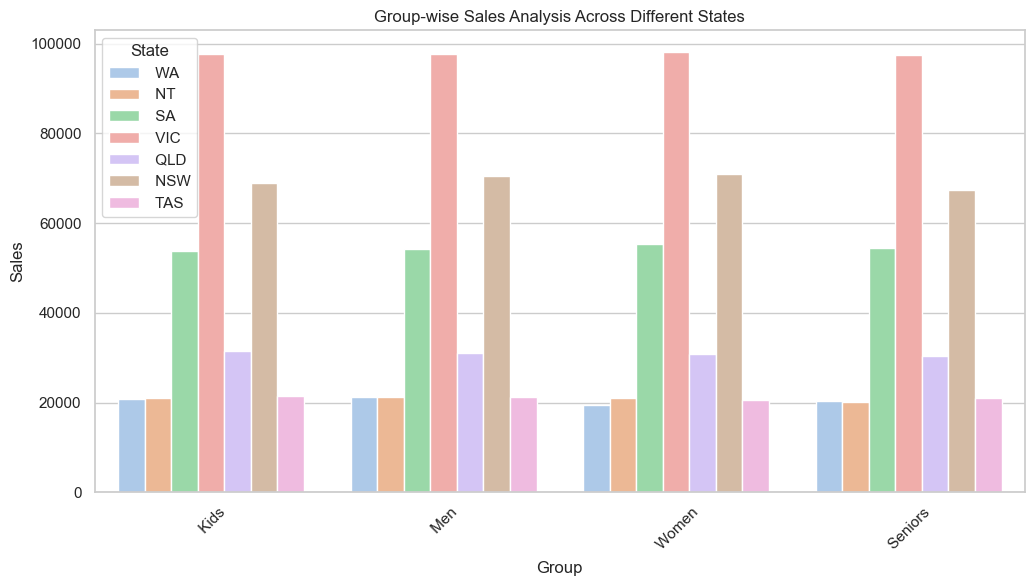

In [65]:
# Group-wise sales analysis across different states
plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='Sales', hue='State', data=df,ci=None,  palette='pastel', saturation=0.7, capsize=0.2, errcolor='0.2') 
plt.title('Group-wise Sales Analysis Across Different States')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

#### *Time-of-the-day analysis*

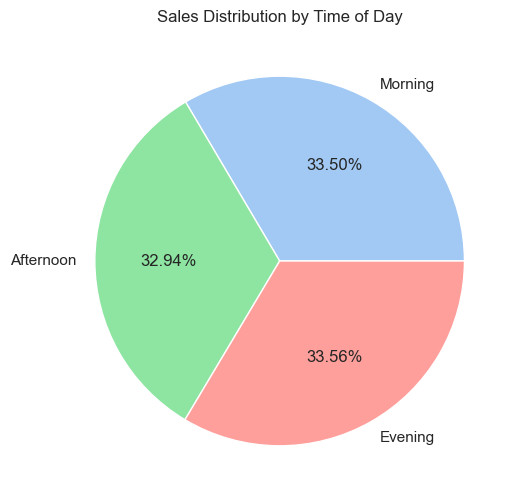

In [66]:

plt.figure(figsize=(12, 6))
dtTime = df.groupby('Time')['Sales'].sum()

colors = ['#a1c9f4', '#8de5a1', '#ff9f9b']

plt.pie(dtTime, labels=['Morning', 'Afternoon', 'Evening'], autopct='%1.2f%%', colors=colors)

plt.title('Sales Distribution by Time of Day')
plt.show()




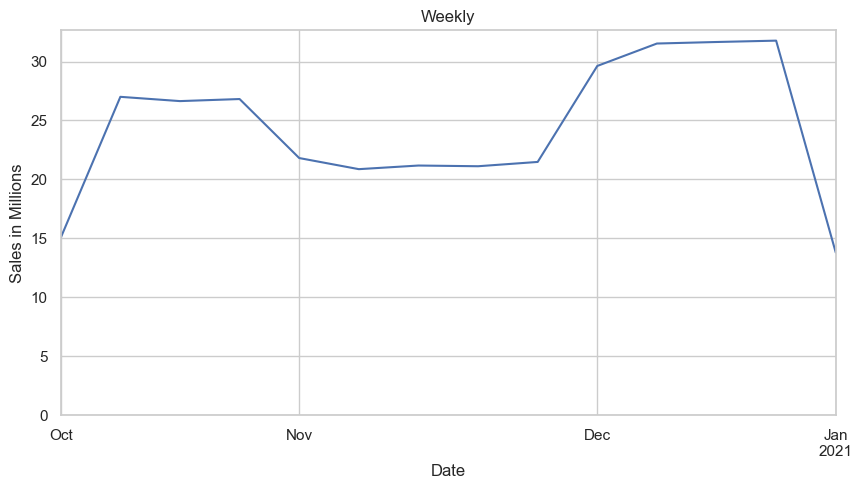

In [67]:
# Group-wise sales analysis across different states
plt.figure(figsize=(10, 5))
w = weekly_report
w = w.div(1000000)
plot = w.plot(title='Weekly',ylim=0,ylabel="Sales in Millions")

plot.yaxis.get_major_formatter().set_scientific(False)

plt.show()


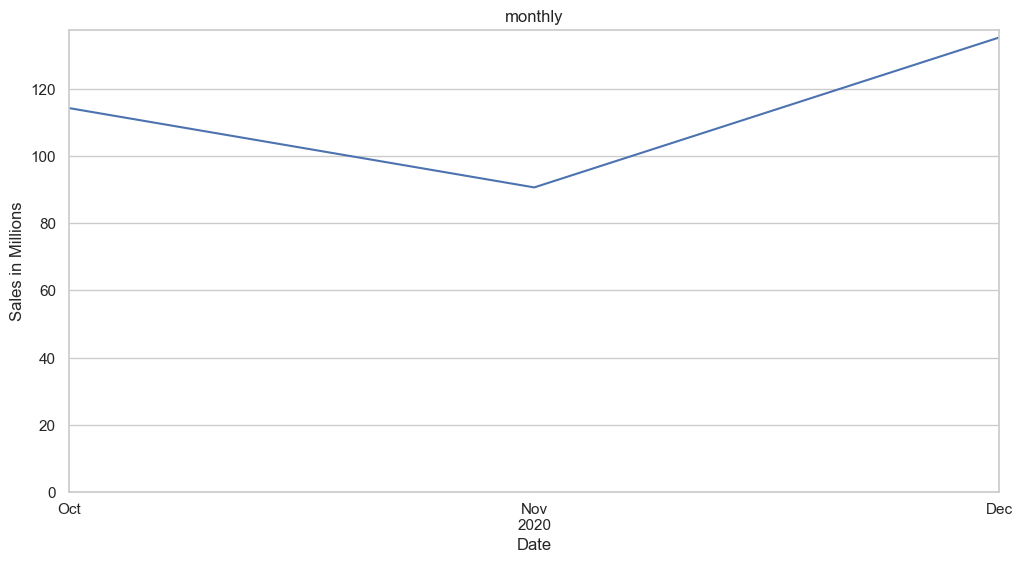

In [68]:
plt.figure(figsize=(12, 6))
w = monthly_report
w = w.div(1000000)
plot = w.plot(title='monthly',ylim=0,ylabel="Sales in Millions")

plot.yaxis.get_major_formatter().set_scientific(False)

plt.show()

### BoxPlot :

Text(0.5, 1.0, '')

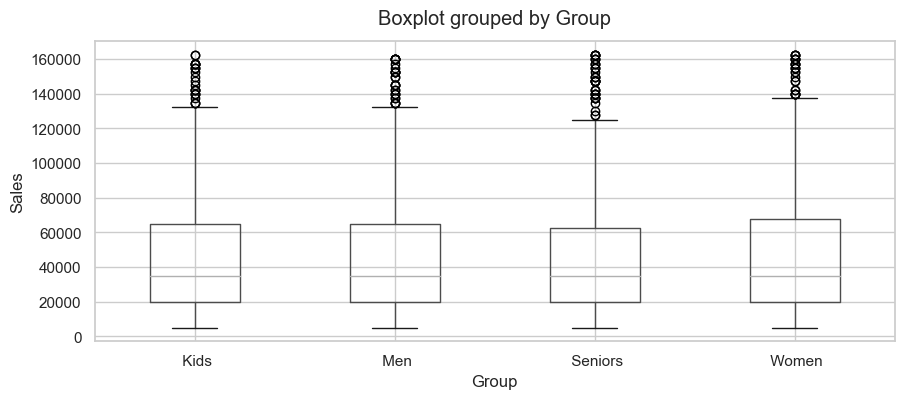

In [69]:
ax = df.boxplot(column='Sales', by='Group', figsize=(10, 4))
ax.set_ylabel('Sales')  
ax.set_title('')

Text(0.5, 1.0, '')

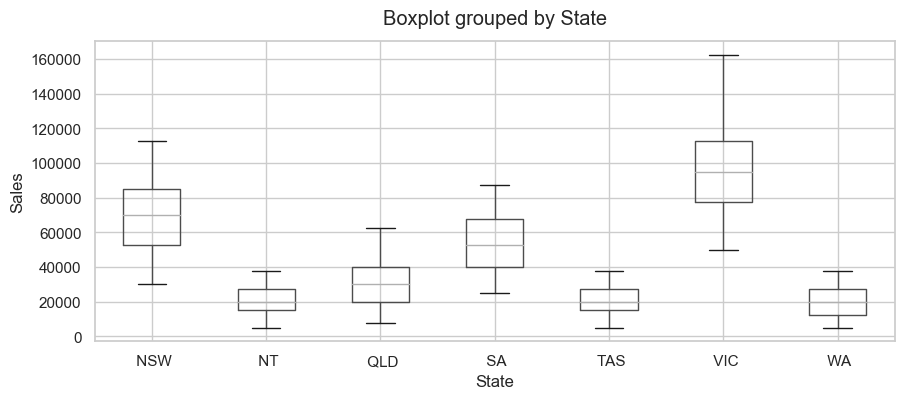

In [70]:
ax = df.boxplot(column='Sales', by='State', figsize=(10, 4))
ax.set_ylabel('Sales')  
ax.set_title('')

Text(0.5, 1.0, '')

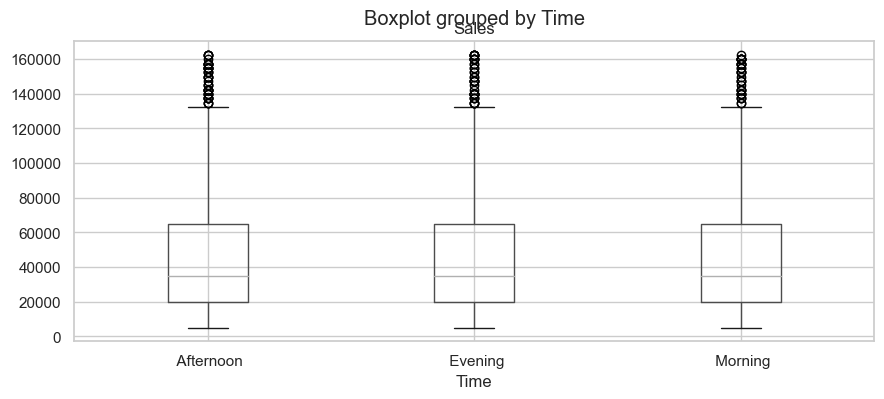

In [71]:
uax = df.boxplot(column='Sales', by='Time', figsize=(10, 4))
ax.set_ylabel('Sales')  
ax.set_title('')

### DashBoard:

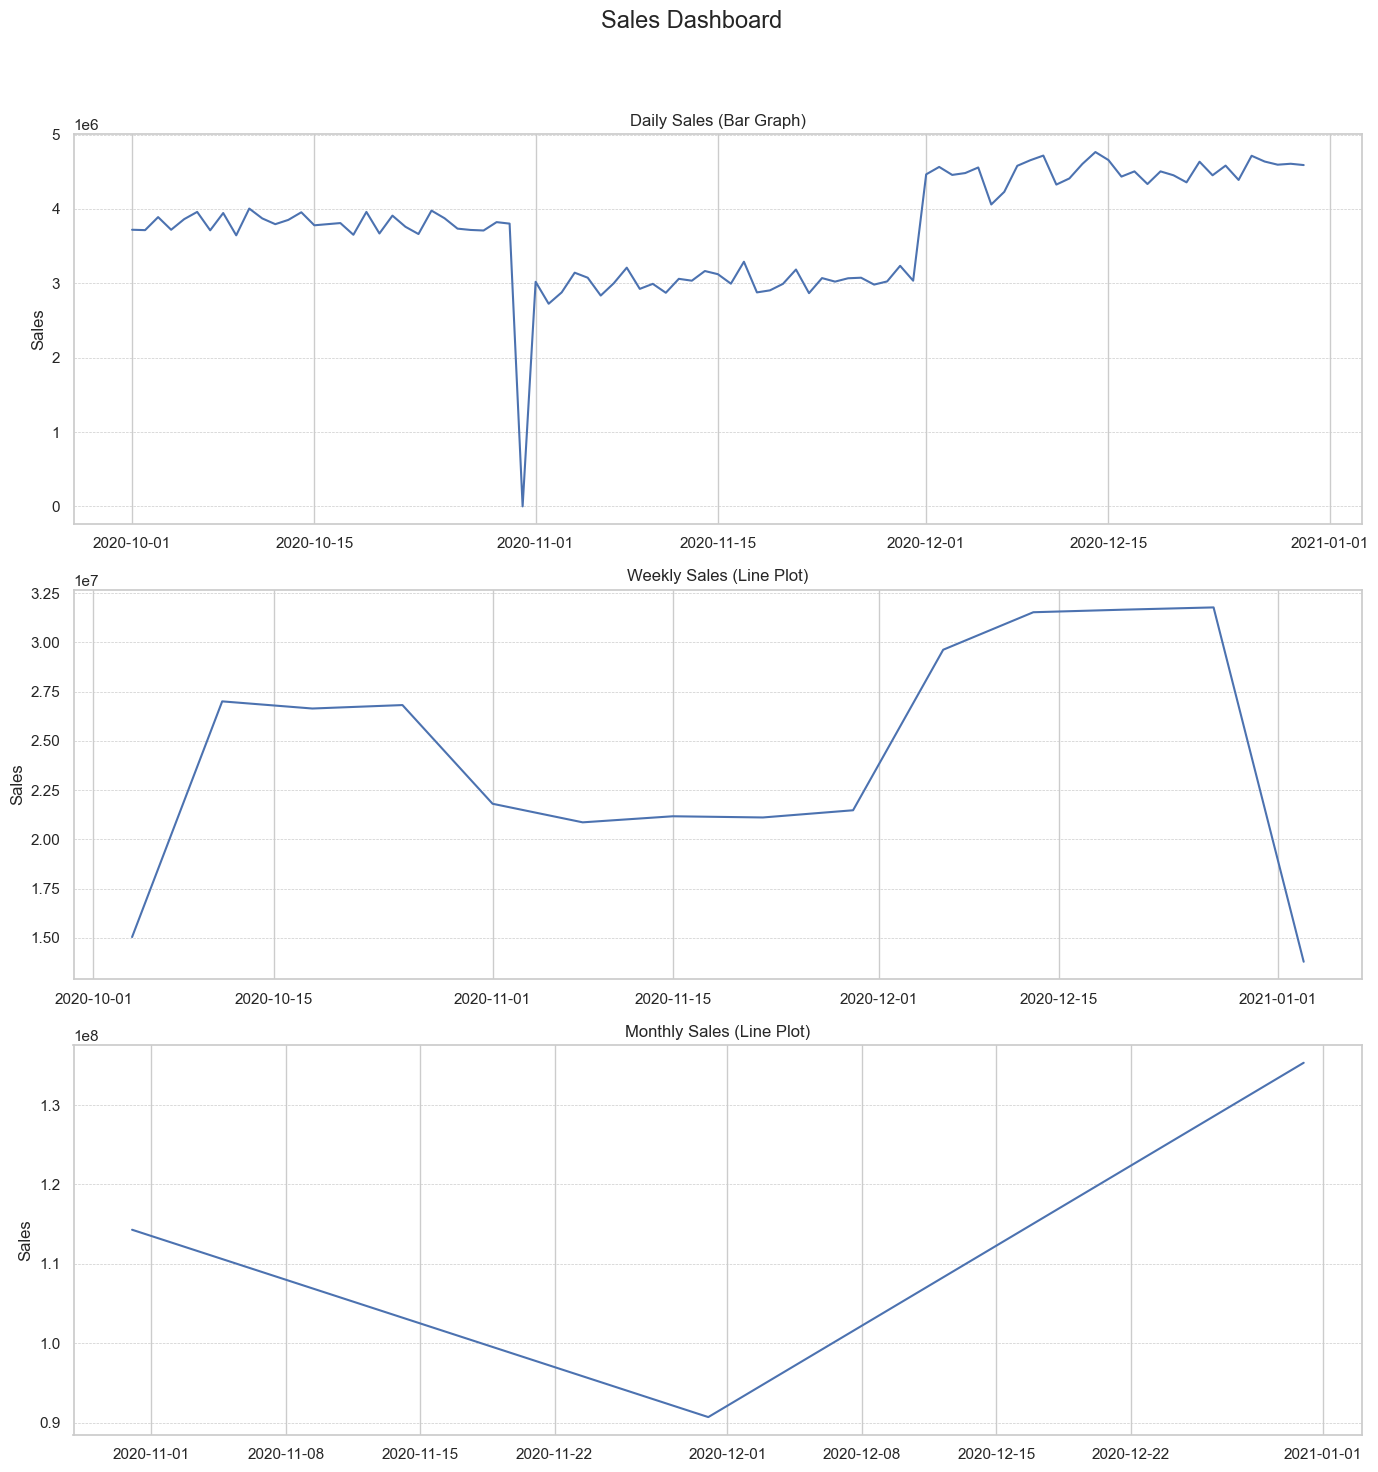

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dashboard with daily, weekly, and monthly charts
sns.set(style="whitegrid")


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(14, 15))  # Changed nrows to 3
fig.suptitle("Sales Dashboard", fontsize=17)

# Daily Chart (Bar Graph)
daily_data = df.resample('D').sum()  # Resample by day
sns.lineplot(x=daily_data.index, y=daily_data['Sales'], ax=axes[0], color='b')
axes[0].set_title('Daily Sales (Bar Graph)')
axes[0].set_xlabel('')
axes[0].set_ylabel('Sales')
axes[0].grid(axis='y', linestyle='--', linewidth=0.5)

# Weekly Chart (Line Plot)
weekly_data = df.resample('W').sum()
sns.lineplot(x=weekly_data.index, y=weekly_data['Sales'], ax=axes[1], color='b')
axes[1].set_title('Weekly Sales (Line Plot)')
axes[1].set_xlabel('')
axes[1].set_ylabel('Sales')
axes[1].grid(axis='y', linestyle='--', linewidth=0.5)

# Monthly Chart (Line Plot)
monthly_data = df.resample('M').sum()
sns.lineplot(x=monthly_data.index, y=monthly_data['Sales'], ax=axes[2], color='b')
axes[2].set_title('Monthly Sales (Line Plot)')
axes[2].set_xlabel('')
axes[2].set_ylabel('Sales')
axes[2].grid(axis='y', linestyle='--', linewidth=0.5)


fig.tight_layout(rect=[0, 0, 1, 0.95])

# Show the dashboard
plt.show()

